# Car Sales Analysis

This Jupyter Notebook provides an analysis of car sales data to uncover trends, customer behaviors, and actionable insights. The data file used in this analysis is named `CarSales.csv`.

## Problem Statement
Understanding key trends and patterns in car sales can help dealerships and manufacturers optimize their strategies, improve customer satisfaction, and increase revenue. However, the lack of actionable insights from existing sales data limits the ability to make informed decisions.

## Business Use Case
This project aims to address the following questions:

1. **Sales Trends**: What are the sales trends by month, region, and dealership?
2. **Product Insights**: Which car models and features (e.g., engine type, transmission, body style) are most popular?
3. **Customer Behavior**: How does customer segmentation (e.g., gender, income level) influence purchasing behavior?

## Goals and Metrics

### Goals
- Provide a detailed analysis of car sales trends.
- Identify factors driving sales performance.
- Offer actionable recommendations for business growth.

### Metrics
- Total sales revenue.
- Monthly sales trends.
- Customer segmentation breakdown.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
file_path = "CarSales.csv"
data = pd.read_csv(file_path)

In [3]:
# Display the first few rows of the dataset
data.head()

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville


In [4]:
# Data Overview
print("Dataset Information:\n")
data.info()
print("\nSummary Statistics:\n")
print(data.describe())

Dataset Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car_id         23906 non-null  object
 1   Date           23906 non-null  object
 2   Customer Name  23905 non-null  object
 3   Gender         23906 non-null  object
 4   Annual Income  23906 non-null  int64 
 5   Dealer_Name    23906 non-null  object
 6   Company        23906 non-null  object
 7   Model          23906 non-null  object
 8   Engine         23906 non-null  object
 9   Transmission   23906 non-null  object
 10  Color          23906 non-null  object
 11  Price ($)      23906 non-null  int64 
 12  Dealer_No      23906 non-null  object
 13  Body Style     23906 non-null  object
 14  Phone          23906 non-null  int64 
 15  Dealer_Region  23906 non-null  object
dtypes: int64(3), object(13)
memory usage: 2.9+ MB

Summary Statistics:

       Annual Income  

In [5]:
# Cleaning Data
# Check for missing values
print("\nMissing Values:\n")
print(data.isnull().sum())


Missing Values:

Car_id           0
Date             0
Customer Name    1
Gender           0
Annual Income    0
Dealer_Name      0
Company          0
Model            0
Engine           0
Transmission     0
Color            0
Price ($)        0
Dealer_No        0
Body Style       0
Phone            0
Dealer_Region    0
dtype: int64


In [6]:
# Fill or drop missing values if necessary (example shown)
data = data.dropna()

In [7]:
# Ensure consistent formatting of columns
data.columns = data.columns.str.strip()

In [8]:
# Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Analysis 1: Sales Trends

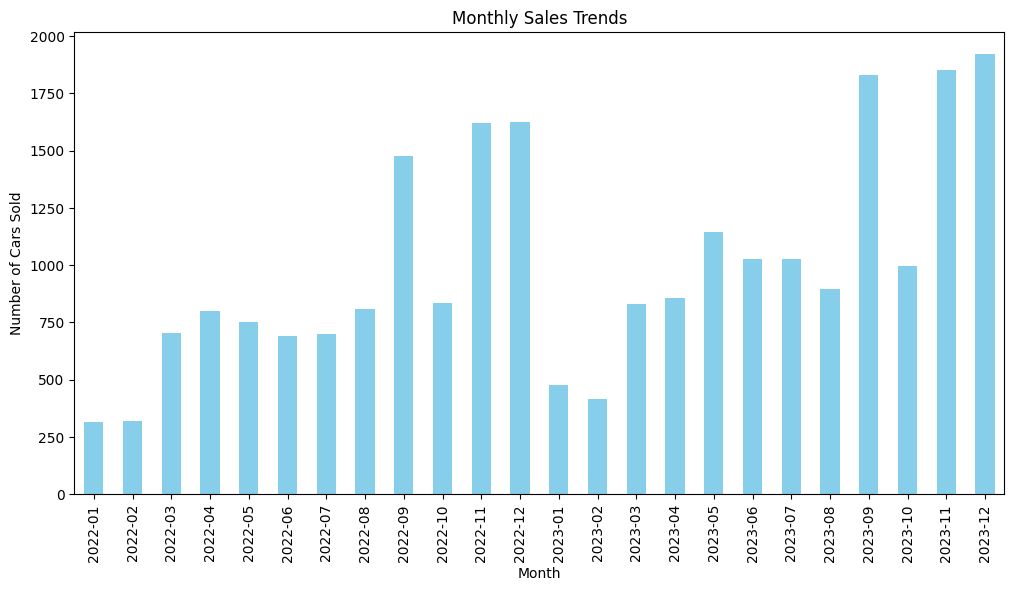

In [9]:
# Monthly sales trends
monthly_sales = data.groupby(data['Date'].dt.to_period('M')).size()
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='bar', color='skyblue')
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Number of Cars Sold')
plt.show()

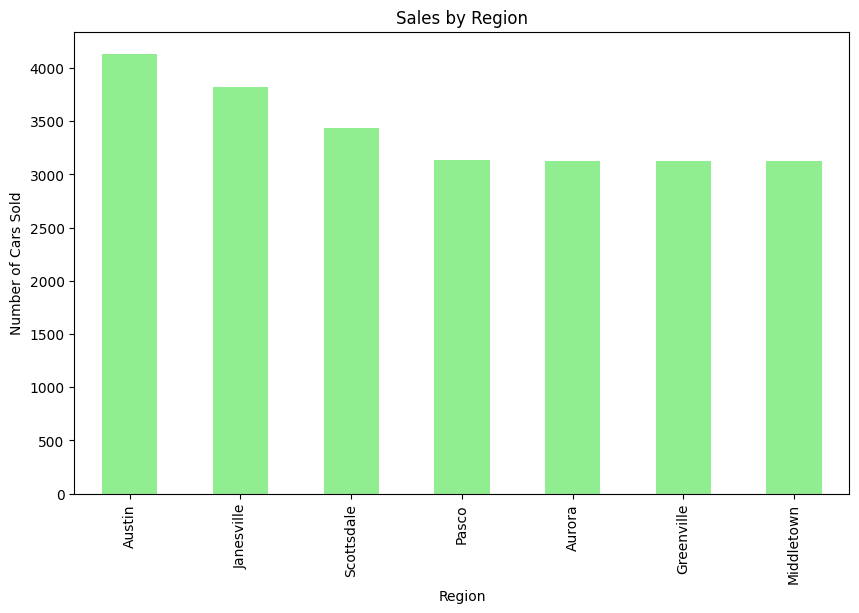

In [10]:
# Sales by region
region_sales = data['Dealer_Region'].value_counts()
plt.figure(figsize=(10, 6))
region_sales.plot(kind='bar', color='lightgreen')
plt.title('Sales by Region')
plt.xlabel('Region')
plt.ylabel('Number of Cars Sold')
plt.show()

# Analysis 2: Product Insights

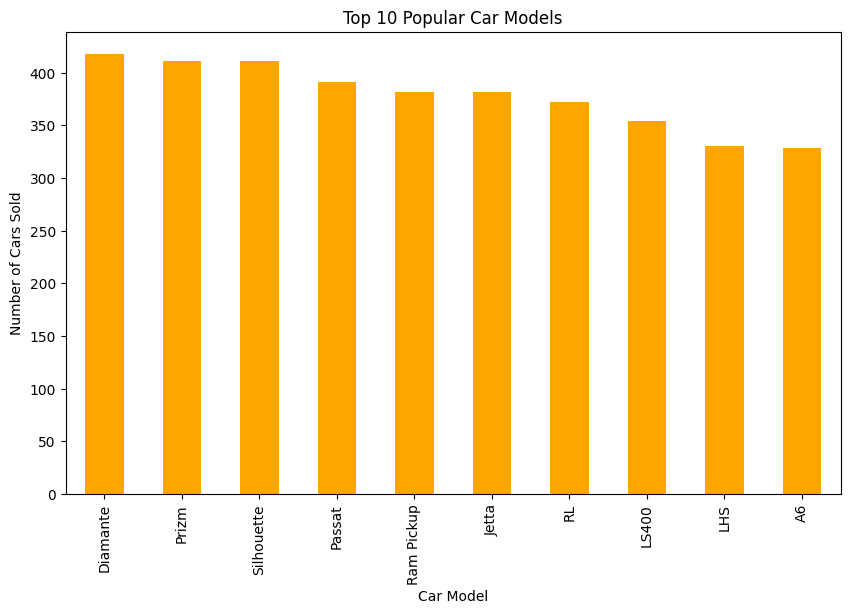

In [11]:
# Popular car models
popular_models = data['Model'].value_counts().head(10)
plt.figure(figsize=(10, 6))
popular_models.plot(kind='bar', color='orange')
plt.title('Top 10 Popular Car Models')
plt.xlabel('Car Model')
plt.ylabel('Number of Cars Sold')
plt.show()

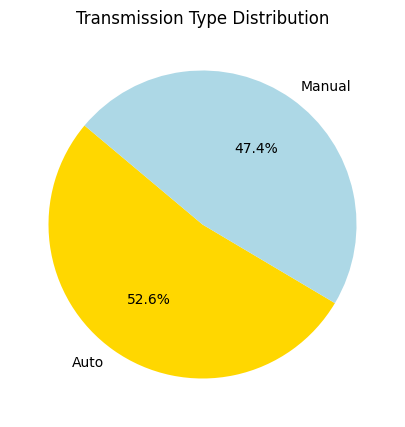

In [12]:
# Transmission type distribution
transmission_distribution = data['Transmission'].value_counts()
plt.figure(figsize=(8, 5))
transmission_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['gold', 'lightblue'])
plt.title('Transmission Type Distribution')
plt.ylabel('')
plt.show()

# Analysis 3: Customer Behavior

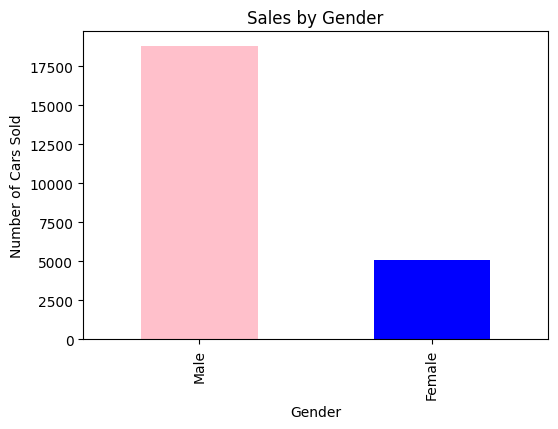

In [13]:
# Gender-based sales
gender_sales = data['Gender'].value_counts()
plt.figure(figsize=(6, 4))
gender_sales.plot(kind='bar', color=['pink', 'blue'])
plt.title('Sales by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Cars Sold')
plt.show()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_1560\2789938974.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='Annual Income', data=data, palette='pastel')


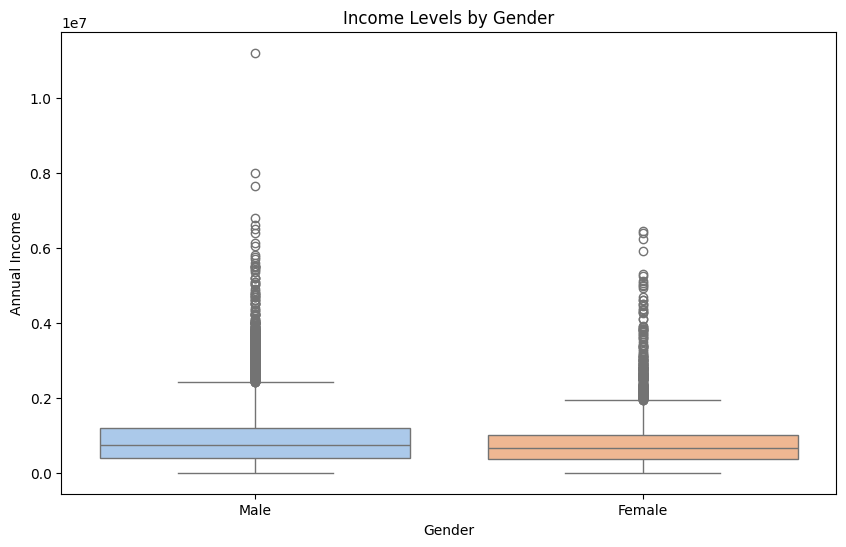

In [14]:
# Income level analysis
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Annual Income', data=data, palette='pastel')
plt.title('Income Levels by Gender')
plt.xlabel('Gender')
plt.ylabel('Annual Income')
plt.show()